<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyxirr
!pip install yfinance==0.2.59

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [3]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-05-07 16:02:23
-------------------
qualified stocks: 94
with latest results: 87
still star stocks: 47
-------------------
Initial Investment:  1.14 C
CY Investment:  1.41 C
Reserve:  6.31 L
Current:  1.23 C
-------------------
Today PnL: 77.79 K (0.63%)
Current PnL: -22.12 L (-15.69%)
CY Booked + Current PnL: -19.29 L (-13.68%)
-------------------
Total profit:  2.89 L
Total loss:  -25.01 L
-------------------
Total Booked + Current PnL: 7.69 L (6.74%)
Total Booked PnL: 29.81 L (26.14%)
Curr Year Booked PnL: 2.83 L (2.3%)
Prev Year Booked PnL: 26.98 L (23.66%)
Est FTT:  2.05 C
Est FTT PnL: 81.32 L (65.9%)
-------------------
Est LTT:  2.66 C
Est LTT PnL: 1.42 C (115.42%)
Deployed:  1.14 C
Current:  1.23 C
CAGR/XIRR %: 5.74%


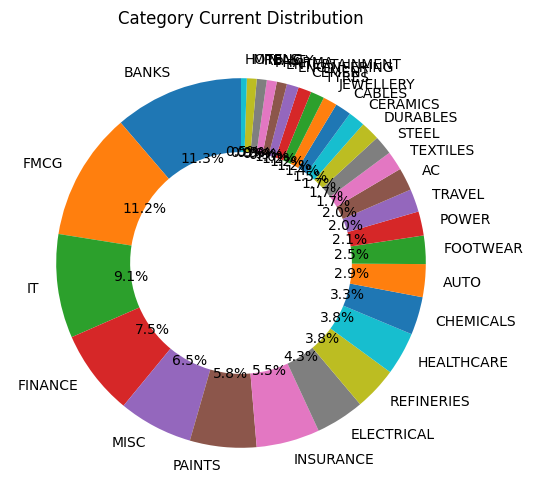

In [4]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Strategy','Category']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc))

In [5]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
52,MRF,114777.60,150504.14,22.35,X-MC,98.94,140420.0,25642.0,10082.0,4.02,...,7.18,31.13,NaN,203.0,2.54,1.20,36.78,AR,ATH,TYRES
70,SBILIFE,1496.49,1924.99,-1.43,H-LC,88.30,146538.0,20833.0,15167.0,1.07,...,10.35,28.63,NaN,116.0,1.37,1.25,30.55,AR,ATH,INSURANCE
57,PIDILITIND,2504.06,3576.00,-14.47,X-LC,38.30,89259.0,14137.0,18021.0,-0.98,...,20.19,42.81,10.0,66.0,0.78,0.76,11.94,X40,BTT,CHEMICALS
71,SBIN,760.30,863.00,-18.54,M-LC,34.04,205666.0,4186.0,23035.0,0.26,...,11.20,13.51,93.0,106.0,0.18,1.76,12.67,XY25,NTT,BANKS
35,ICICIGI,1852.76,2268.71,-18.03,H-LC,40.43,98604.0,-1445.0,23902.0,1.72,...,24.24,22.45,52.0,93.0,-0.06,0.84,19.64,X40,ATH,INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,RBLBANK,230.61,388.00,32.03,M-SC,86.17,204653.0,-29647.0,189550.0,2.15,...,92.62,68.25,-48.0,207.0,-0.16,1.75,34.77,XY24,NTT,BANKS
66,SAIL,130.64,228.00,72.16,M-MC,63.83,195757.0,-29205.0,196853.0,1.89,...,100.56,74.53,-18.0,205.0,-0.15,1.67,13.66,XY24,BTT,STEEL
64,REPCOHOME,515.07,880.00,-59.02,H-SC,73.40,150344.0,-54654.0,199897.0,0.41,...,132.96,70.85,-44.0,112.0,-0.27,1.28,21.37,XY24,NTT,FINANCE
11,BANDHANBNK,214.25,400.00,-37.71,H-SC,70.21,185090.0,-63440.0,278912.0,1.34,...,150.69,86.70,-29.0,13.0,-0.23,1.58,22.45,XY24,NTT,BANKS


In [6]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
0,5PAISA,564.75,810.00,118.75,H-SC,21.28,118266.0,-68666.0,149843.0,-0.75,...,126.70,43.43,20.0,164.0,-0.46,1.01,13.14,X40N,BTT,FINANCE
2,ABB,5319.37,8953.12,-40.55,H-LC,69.15,134938.0,1954.0,88897.0,1.19,...,65.88,68.31,NaN,3.0,0.02,1.15,10.03,AR,ATH,ELECTRICAL
4,ADANIPORTS,1103.69,1583.00,3.96,M-LC,93.62,183333.0,32127.0,33532.0,1.32,...,18.29,43.43,NaN,45.0,0.96,1.57,27.08,XY24,NTT,MISC
5,ALKYLAMINE,2347.98,4567.52,-18.14,X-SC,36.17,73104.0,-27859.0,123297.0,0.25,...,168.66,94.53,-59.0,67.0,-0.23,0.62,8.38,SR,ATH,CHEMICALS
6,ANGELONE,2328.67,3033.00,-5.38,H-SC,75.53,154420.0,3056.0,42728.0,3.32,...,27.67,30.25,77.0,108.0,0.07,1.32,22.22,X40N,NTT,FINANCE
7,ASIANPAINT,2961.56,4250.00,-30.84,X-LC,13.83,158719.0,-42667.0,130277.0,-3.47,...,82.08,43.51,-18.0,88.0,-0.33,1.36,9.47,X40,BTT,PAINTS
12,BANKINDIA,113.49,190.00,-29.61,M-MC,31.38,124258.0,-4894.0,91963.0,0.11,...,74.01,67.42,-12.0,99.0,-0.05,1.06,20.85,XR,NTT,BANKS
13,BATAINDIA,1550.24,2096.00,-33.06,M-SC,26.60,100654.0,-28016.0,73316.0,0.47,...,72.84,35.20,-8.0,63.0,-0.38,0.86,2.69,X40,NTT,FOOTWEAR
14,BERGEPAINT,558.54,680.00,-19.98,H-MC,47.87,171608.0,-5449.0,43949.0,-0.35,...,25.61,21.75,-14.0,154.0,-0.12,1.47,22.76,XY24,NTT,PAINTS
15,BRITANNIA,4902.95,6446.05,8.55,X-LC,49.47,214040.0,17922.0,43793.0,-0.79,...,20.46,31.47,239.0,141.0,0.41,1.83,16.96,AR,ATH,FMCG


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
3,ACC,2579.05,3906.0,-37.64,M-MC,4.26,134678.0,-53593.0,150462.0,-0.22,...,111.72,51.45,-37.0,96.0,-0.36,1.15,1.45,XY24,BTT,CEMENT
4,ADANIPORTS,1103.69,1583.0,3.96,M-LC,93.62,183333.0,32127.0,33532.0,1.32,...,18.29,43.43,NaN,45.0,0.96,1.57,27.08,XY24,NTT,MISC
9,ATULAUTO,624.44,844.0,3343.24,M-SC,10.64,107356.0,-40012.0,91832.0,0.05,...,85.54,35.16,-49.0,188.0,-0.44,0.92,9.65,XY24,NTT,AUTO
10,AWL,361.39,485.0,-69.44,H-MC,9.57,134750.0,-51366.0,115023.0,1.22,...,85.36,34.20,-36.0,6.0,-0.45,1.15,10.99,XY24,NTT,FMCG
11,BANDHANBNK,214.25,400.0,-37.71,H-SC,70.21,185090.0,-63440.0,278912.0,1.34,...,150.69,86.70,-29.0,13.0,-0.23,1.58,22.45,XY24,NTT,BANKS
14,BERGEPAINT,558.54,680.0,-19.98,H-MC,47.87,171608.0,-5449.0,43949.0,-0.35,...,25.61,21.75,-14.0,154.0,-0.12,1.47,22.76,XY24,NTT,PAINTS
17,CAMPUS,294.86,393.0,NaN,NaN,32.98,137152.0,-30623.0,86461.0,-1.06,...,63.04,33.28,-16.0,NaN,-0.35,1.17,6.19,XY24,NTT,FOOTWEAR
22,DABUR,505.20,735.0,-14.74,X-MC,52.13,188019.0,-9009.0,98635.0,0.31,...,52.46,45.49,1.0,81.0,-0.09,1.61,6.80,XY24,BTT,FMCG
26,EASEMYTRIP,18.12,26.4,23.51,M-SC,39.36,119048.0,-57767.0,138560.0,0.41,...,116.39,45.70,-91.0,14.0,-0.42,1.02,10.51,XY24,NTT,TRAVEL
29,GREENPANEL,375.16,537.0,150.65,M-SC,41.49,111952.0,-71126.0,150105.0,-1.89,...,134.08,43.14,-17.0,70.0,-0.47,0.96,5.31,XY24,NTT,MISC


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
1,AARTIIND,487.04,919.00,21.09,M-SC,100.00,76561.0,-4775.0,76913.0,5.32,...,100.46,88.69,-8.0,114.0,-0.06,0.65,29.10,XR,NTT,CHEMICALS
2,ABB,5319.37,8953.12,-40.55,H-LC,69.15,134938.0,1954.0,88897.0,1.19,...,65.88,68.31,NaN,3.0,0.02,1.15,10.03,AR,ATH,ELECTRICAL
5,ALKYLAMINE,2347.98,4567.52,-18.14,X-SC,36.17,73104.0,-27859.0,123297.0,0.25,...,168.66,94.53,-59.0,67.0,-0.23,0.62,8.38,SR,ATH,CHEMICALS
8,ASIANTILES,75.41,137.00,4783.33,M-SC,29.79,53554.0,-40256.0,116871.0,-0.69,...,218.23,81.67,-16.0,145.0,-0.34,0.46,3.71,XR,NTT,CERAMICS
12,BANKINDIA,113.49,190.00,-29.61,M-MC,31.38,124258.0,-4894.0,91963.0,0.11,...,74.01,67.42,-12.0,99.0,-0.05,1.06,20.85,XR,NTT,BANKS
15,BRITANNIA,4902.95,6446.05,8.55,X-LC,49.47,214040.0,17922.0,43793.0,-0.79,...,20.46,31.47,239.0,141.0,0.41,1.83,16.96,AR,ATH,FMCG
16,BSOFT,628.85,844.81,-27.58,M-SC,77.66,68198.0,-41851.0,79642.0,1.41,...,116.78,34.34,-28.0,15.0,-0.53,0.58,12.27,XR,ATH,IT
18,CAMS,3643.00,5250.99,-7.88,H-SC,31.38,101996.0,-8.0,45031.0,0.96,...,44.15,44.14,261.0,26.0,-0.00,0.87,19.44,XR,ATH,MISC
20,COFFEEDAY,59.14,80.00,-59.76,L-SC,60.64,59021.0,-54528.0,94581.0,-2.01,...,160.25,35.27,NaN,151.0,-0.58,0.50,44.45,XR,NTT,HOTELS
23,DEN,52.79,75.00,78.76,L-SC,54.26,50560.0,-33904.0,69439.0,-0.28,...,137.34,42.07,-21.0,136.0,-0.49,0.43,7.37,AR,NTT,ENTERTAINMENT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.85
1,20,35.16
2,30,47.85


In [10]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,35.94
X40N,14.02
X40,13.72
AR,12.09
XY25,11.43
XR,10.49
X200,1.17
SR,1.16


In [11]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,21.39
X-LC,18.82
M-SC,16.33
M-LC,8.13
M-MC,7.71
X-MC,7.10
H-MC,6.45
H-LC,5.61
X-SC,2.61


In [12]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.72
XY25      X-LC          7.31
X40       X-LC          7.06
XY24      M-SC          6.83
X40N      H-SC          6.08
XY24      M-LC          5.08
          M-MC          5.03
X40N      M-SC          3.76
AR        X-LC          3.28
          H-LC          3.27
XY24      X-MC          3.18
XR        H-SC          3.10
          M-SC          2.86
XY24      H-MC          2.62
X40       H-SC          2.04
          M-SC          1.81
XY25      M-LC          1.76
X40N      X-MC          1.59
XY25      H-LC          1.50
AR        H-SC          1.45
X40N      H-MC          1.41
XR        M-LC          1.29
AR        X-MC          1.20
X40N      X-SC          1.18
X200      X-LC          1.17
AR        H-MC          1.17
X40       X-MC          1.13
XR        M-MC          1.06
          L-SC          0.96
XY24      L-SC          0.89
XY25      M-MC          0.86
X40       H-LC          0.84
          H-MC          0.84
XR        X-SC          0.81
AR        M-MC          0.76
SR        X-SC          0.62
          M-SC          0.54
AR        M-SC          0.53
          L-SC          0.43
XR        H-MC          0.41
Name: CurrAlloc%, dtype: float64

In [13]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,11.29,-14.04,69.97
FMCG,11.22,-2.85,34.34
IT,9.08,-28.21,95.32
FINANCE,7.47,-26.61,83.74
MISC,6.51,-35.49,84.52
PAINTS,5.83,-20.76,56.49
INSURANCE,5.54,-7.94,40.51
ELECTRICAL,4.24,-11.71,68.63
REFINERIES,3.79,8.36,8.53


In [14]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,69.52,8138139.0,-14.21,-1156293.0,59.33,4828346.0


In [15]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,64.25,7519560.0,-9.83,-738806.0,50.09,3766714.0


In [16]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3221244.0
XR,1315556.0
X40N,1260849.0
AR,1079752.0
X40,767567.0
SR,208421.0
XY25,197456.0
X200,81093.0


In [17]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2347472.0
M-SC,2011154.0
X-LC,778564.0
M-MC,687307.0
X-SC,371566.0
H-MC,368787.0
M-LC,365055.0
L-SC,330758.0
X-MC,324544.0


In [18]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          970549.0
          M-SC          817973.0
X40N      H-SC          585222.0
XY24      M-MC          483872.0
XR        M-SC          450187.0
X40N      M-SC          397096.0
X40       X-LC          396504.0
AR        H-SC          391234.0
XR        H-SC          311245.0
XY24      M-LC          232929.0
AR        X-LC          195556.0
XR        L-SC          166582.0
X40       M-SC          166236.0
XY24      H-MC          158972.0
AR        H-LC          156934.0
XY24      X-MC          140453.0
XR        X-SC          131414.0
SR        X-SC          123297.0
X40N      X-SC          116855.0
          X-MC          115345.0
XR        M-LC          109091.0
XY25      X-LC          105411.0
XY24      L-SC           94737.0
AR        M-SC           94538.0
XR        M-MC           91963.0
X40       H-SC           89222.0
AR        M-MC           86598.0
SR        M-SC           85124.0
X200      X-LC           81093.0
AR        H-MC           75371.0
          L-SC           69439.0
X40       X-MC           58664.0
XR        H-MC           55074.0
X40N      H-MC           46331.0
XY25      H-LC           44136.0
X40       H-MC           33039.0
XY25      M-MC           24874.0
X40       H-LC           23902.0
XY25      M-LC           23035.0
AR        X-MC           10082.0
Name: FTT Amt, dtype: float64

In [19]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
H-SC,21
M-SC,20
X-LC,12
M-MC,7
H-MC,6
M-LC,6
X-MC,6
H-LC,5
X-SC,4
